In [1]:
#Importing Various Python modules 

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
import csv
from time import sleep
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error 
%matplotlib inline

In [2]:
#Midfielders

players_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dict_output1.csv',index_col='web_name', na_filter=False)

#Observing the Data for Exploration
players_df.head()
players_df.tail()
players_df.dtypes
players_df.iloc[0,:]


transfers_out                                                              161257
yellow_cards                                                                    1
code                                                                        59936
event_total                                                                     2
goals_conceded                                                                 13
photo                                                                   59936.jpg
red_cards                                                                       0
saves                                                                          26
ep_this                                                                         4
value_form                                                                    0.7
next_fixture                                                          Man Utd (H)
team_id                                                                         1
goals_scored    

In [3]:
#Filtering the data only for Midfielders
players_df[players_df.type_name=='Midfielder'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated_Mid.csv')

Midfielder_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/players_updated_Mid.csv',index_col='web_name', na_filter=False)

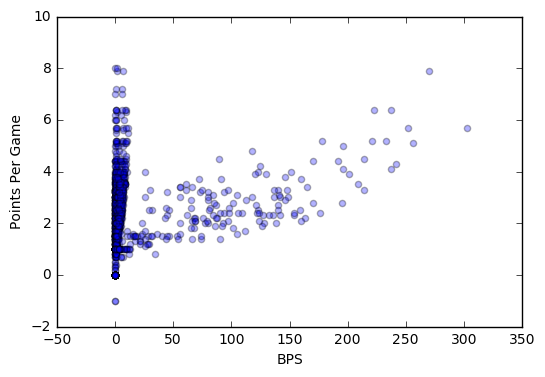

In [5]:
#Some random plotting to determine which attributes to use in the final model
plt.scatter(players_df.value_form, players_df.points_per_game, alpha=0.3)
plt.scatter(players_df.value_season, players_df.points_per_game, alpha=0.3) 
plt.scatter(Midfielder_df.bps, Midfielder_df.points_per_game, alpha=0.3) 
plt.xlabel("BPS")
plt.ylabel("Points Per Game")

In [6]:
#Exploring the data in the Midfielders data frame
Midfielder_df.describe()
Midfielder_df.head()
Midfielder_df.tail()
Midfielder_df.dtypes
Midfielder_df.points_per_game.describe()
Midfielder_df.points_per_game.value_counts()
Midfielder_df.isnull()

,transfers_out,yellow_cards,code,event_total,goals_conceded,photo,red_cards,saves,ep_this,value_form,...,minutes,transfers_in_event,selected_by,element_type,ep_next,team,chance_of_playing_this_round,event_points,second_name,cost_change_event
web_name,,,,,,,,,,,,,,,,,,,,,
Wilshere,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Walcott,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ramsey,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rosicky,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Arteta,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Chamberlain,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cazorla,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Diaby,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gnabry,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Creating  Initial Linear Model for Midfielders

midfielders_model = smf.ols(formula='event_total ~ selected_by + value_form + value_season + form + ea_index + bps', data=Midfielder_df).fit()
midfielders_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     66.26
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           3.41e-49
Time:                        19:26:32   Log-Likelihood:                -401.38
No. Observations:                 261   AIC:                             816.8
Df Residuals:                     254   BIC:                             841.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.0248      0.101      0.245      0.807        -0.175     0.224
selected_by      0.0720      0.017      4.227      0.000         0.038     0.106
value_form       2.7753      1.101      2.521      0.012         0.607     4.943
value_season     0.0674      0.096      0.700      0.485        -0.122     0.257
form             0.4222      0.172      2.449      0.015         0.083     0.762
ea_index        -0.0216      0.005     -4.225      0.000        -0.032    -0.012
bps              0.0135      0.004      3.177      0.002         0.005     0.022
==============================================================================
Omnibus:                      103.461   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              773.187
Skew:                           1.381   Prob(JB):                    1.27e-168
Kurtosis:                      10.967   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1170b1e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b2cbf28>]], dtype=object)

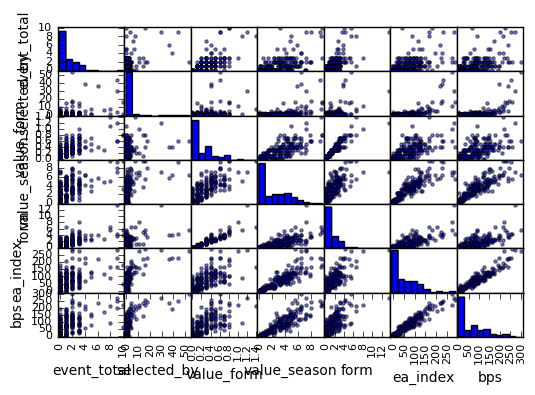

In [8]:
# Exploring Multi-collinearity between Variables
columns = ['event_total', 'selected_by', 'value_form', 'value_season', 'form','ea_index','bps']
pd.scatter_matrix(Midfielder_df[columns])

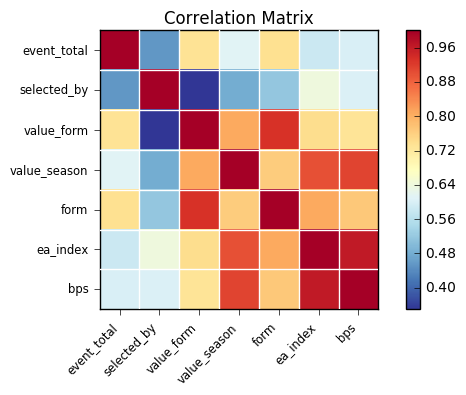

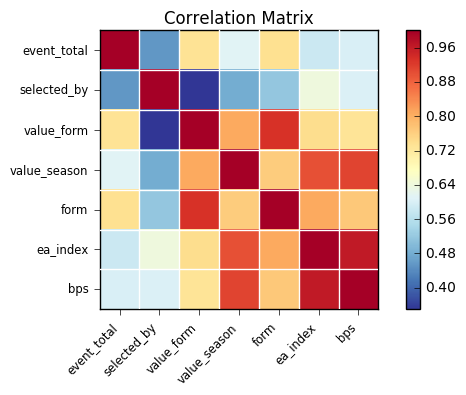

In [10]:
corr_matrix = np.corrcoef(Midfielder_df[columns].T)
sm.graphics.plot_corr(corr_matrix, xnames=columns)

In [11]:
# Its obvious from the Correlation Matrix that there is correlation between bps - ea_index & form - value_form
# Hence removing bps & value_from model and exploring
midfielders_model = smf.ols(formula='event_total ~ selected_by + form + value_season + ea_index', data=Midfielder_df).fit()
midfielders_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     89.87
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           1.30e-47
Time:                        19:27:32   Log-Likelihood:                -409.84
No. Observations:                 261   AIC:                             829.7
Df Residuals:                     256   BIC:                             847.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.0520      0.104      0.500      0.617        -0.153     0.257
selected_by      0.0599      0.016      3.684      0.000         0.028     0.092
form             0.7801      0.075     10.344      0.000         0.632     0.929
value_season     0.3111      0.074      4.216      0.000         0.166     0.456
ea_index        -0.0142      0.003     -4.214      0.000        -0.021    -0.008
==============================================================================
Omnibus:                      110.037   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.326
Skew:                           1.546   Prob(JB):                    2.83e-156
Kurtosis:                      10.504   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Removing players who have played 0 minutes till now
Midfielder_df[Midfielder_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders.csv')
regular_midfielders_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders.csv',index_col='web_name', na_filter=False)

In [13]:
# Running all features models for data set without fringe players
# This inculdes all the possible features, just to study the importance of each feature
all_features_model = smf.ols(formula='event_total ~ selected_by + total_points+ chance_of_playing_this_round + value_form + value_season + form + transfers_out_event+ transfers_in_event + points_per_game + minutes +ea_index + bps', data=regular_midfielders_df).fit()
all_features_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            event_total   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     19.29
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           5.48e-30
Time:                        19:27:44   Log-Likelihood:                -315.47
No. Observations:                 196   AIC:                             662.9
Df Residuals:                     180   BIC:                             715.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.3386      0.319     -1.062      0.290        -0.968     0.291
chance_of_playing_this_round[T.0]      -0.4519      0.318     -1.421      0.157        -1.079     0.176
chance_of_playing_this_round[T.100]     0.2618      0.215      1.219      0.225        -0.162     0.686
chance_of_playing_this_round[T.50]     -0.9708      1.376     -0.705      0.481        -3.686     1.744
chance_of_playing_this_round[T.75]     -0.6049      0.757     -0.799      0.425        -2.098     0.888
selected_by                             0.1072      0.033      3.275      0.001         0.043     0.172
total_points                            0.0394      0.053      0.740      0.460        -0.066     0.145
value_form                              5.7177      1.804      3.169      0.002         2.157     9.278
value_season                           -0.4017      0.238     -1.690      0.093        -0.871     0.067
form                                   -0.2935      0.314     -0.935      0.351        -0.913     0.326
transfers_out_event                 -8.919e-05   4.52e-05     -1.972      0.050        -0.000  6.18e-08
transfers_in_event                   5.953e-05   2.38e-05      2.501      0.013      1.26e-05     0.000
points_per_game                         0.3870      0.241      1.603      0.111        -0.089     0.863
minutes                                 0.0018      0.001      1.849      0.066        -0.000     0.004
ea_index                               -0.0184      0.006     -2.877      0.005        -0.031    -0.006
bps                                     0.0065      0.005      1.197      0.233        -0.004     0.017
==============================================================================
Omnibus:                       88.467   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.458
Skew:                           1.599   Prob(JB):                    4.37e-118
Kurtosis:                      10.480   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Creating two interaction terms based on what we learned from multi-collinearity matrix
regular_midfielders_df['interaction_term1'] = regular_midfielders_df.value_form * regular_midfielders_df.form
regular_midfielders_df['interaction_term2'] = regular_midfielders_df.value_season * regular_midfielders_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X = regular_midfielders_df[cols]

y = regular_midfielders_df.event_total

lm = LinearRegression()


In [15]:
scores = cross_val_score(lm, X, y, cv=5, scoring='mean_squared_error')

In [16]:
#Calculating Root Mean Squared Error
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Nov Model 1.7554

1.7554728895539029

In [17]:
midfielders_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec1_players.csv',index_col='web_name', na_filter=False)

midfielders_dec1_df[midfielders_dec1_df.type_name=='Midfielder'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/midfieldplayers_dec1.csv')

midfielders_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/midfieldplayers_dec1.csv',index_col='web_name', na_filter=False)

midfielders_dec1_df[midfielders_dec1_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders_dec1.csv')
regular_midfielders_dec1_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders_dec1.csv',index_col='web_name', na_filter=False)


regular_midfielders_dec1_df['interaction_term1'] = regular_midfielders_dec1_df.value_form * regular_midfielders_dec1_df.form
regular_midfielders_dec1_df['interaction_term2'] = regular_midfielders_dec1_df.value_season * regular_midfielders_dec1_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X2 = regular_midfielders_dec1_df[cols]

y2 = regular_midfielders_dec1_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X2, y2, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Dec1 Model 1.777


1.7772633411426422

In [18]:
midfielders_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec4_players.csv',index_col='web_name', na_filter=False)

midfielders_dec4_df[midfielders_dec4_df.type_name=='Midfielder'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/midfieldplayers_dec4.csv')

midfielders_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/midfieldplayers_dec4.csv',index_col='web_name', na_filter=False)

midfielders_dec4_df[midfielders_dec4_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders_dec4.csv')
regular_midfielders_dec4_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders_dec4.csv',index_col='web_name', na_filter=False)


regular_midfielders_dec4_df['interaction_term1'] = regular_midfielders_dec4_df.value_form * regular_midfielders_dec4_df.form
regular_midfielders_dec4_df['interaction_term2'] = regular_midfielders_dec4_df.value_season * regular_midfielders_dec4_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X3 = regular_midfielders_dec4_df[cols]

y3 = regular_midfielders_dec4_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X3, y3, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Dec1 Model 1.9237


1.923718511914456

In [19]:
midfielders_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/dec9_players.csv',index_col='web_name', na_filter=False)

midfielders_dec9_df[midfielders_dec9_df.type_name=='Midfielder'].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/midfieldplayers_dec9.csv')

midfielders_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/midfieldplayers_dec9.csv',index_col='web_name', na_filter=False)

midfielders_dec9_df[midfielders_dec9_df.minutes> 0].to_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders_dec9.csv')
regular_midfielders_dec9_df = pd.read_csv('/Users/rohitthomas/Downloads/Fantasy-Premier-League-Points-Predictor-master/Data/regular_midfielders_dec9.csv',index_col='web_name', na_filter=False)


regular_midfielders_dec9_df['interaction_term1'] = regular_midfielders_dec9_df.value_form * regular_midfielders_dec9_df.form
regular_midfielders_dec9_df['interaction_term2'] = regular_midfielders_dec9_df.value_season * regular_midfielders_dec9_df.form


cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']


X4 = regular_midfielders_dec9_df[cols]

y4 = regular_midfielders_dec9_df.event_total

lm = LinearRegression()
scores = cross_val_score(lm, X4, y4, cv=5, scoring='mean_squared_error')
np.sqrt(-scores)
np.mean(np.sqrt(-scores)) #RMSE for Dec1 Model 1.3377


1.3377207432950904

In [22]:
# Training the model on the November Data Set & Testing for Dec 1, Dec4 & Dec 9 Data 

cols = ['points_per_game','now_cost','selected_by', 'interaction_term1','interaction_term2', 'ea_index']
X = regular_midfielders_df[cols]
y = regular_midfielders_df.event_total
lm = LinearRegression()
#rf = RandomForestClassifier(n_estimators=100)
#rf.fit(X,y)
lm.fit(X, y) # fitting the linear regression on Nov values of X & Y

# Testing and Predicting for Dec 1 Data set
preds = lm.predict(X2) #X for Dec 1
# calc RMSE to compare preds vs y for Dec 1
rms = np.sqrt(mean_squared_error(y2, preds))
rms # RMSE for preds for Dec1 data set 1.722


# Testing and Predicting for Dec 4 Data set
preds = lm.predict(X3) #X for Dec 4
# calc RMSE to compare preds vs y for Dec 4
rms = np.sqrt(mean_squared_error(y3, preds))
rms # RMSE for preds for Dec4 data set 1.9070

# Testing and Predicting for Dec 9 Data set
preds = lm.predict(X4) #X for Dec 9
# calc RMSE to compare preds vs y for Dec 9
rms = np.sqrt(mean_squared_error(y4, preds))
rms # RMSE for preds for Dec9 data set 1.4177

1.7227506982694214